In [138]:
import pandas as pd

# 데이터 경로 설정
file_path = 'C:\\Users\\JY\\Desktop\\jy\\4grade\\수업\\데이터공학\\프로젝트\\marsTamsa\\REMS_Mars_Dataset.csv'  # 데이터 파일이 있는 경로

# 데이터 불러오기
data = pd.read_csv(file_path)

# 데이터 확인
data.head()


,earth_date_time,mars_date_time,sol_number,max_ground_temp(°C),min_ground_temp(°C),max_air_temp(°C),min_air_temp(°C),mean_pressure(Pa),wind_speed(m/h),humidity(%),sunrise,sunset,UV_Radiation,weather
0,"Earth, 2022-01-26 UTC","Mars, Month 6 - LS 163°",Sol 3368,-3,-71,10,-84,707,Value not available,Value not available,05:25,17:20,moderate,Sunny
1,"Earth, 2022-01-25 UTC","Mars, Month 6 - LS 163°",Sol 3367,-3,-72,10,-87,707,Value not available,Value not available,05:25,17:20,moderate,Sunny
2,"Earth, 2022-01-24 UTC","Mars, Month 6 - LS 162°",Sol 3366,-4,-70,8,-81,708,Value not available,Value not available,05:25,17:21,moderate,Sunny
3,"Earth, 2022-01-23 UTC","Mars, Month 6 - LS 162°",Sol 3365,-6,-70,9,-91,707,Value not available,Value not available,05:26,17:21,moderate,Sunny
4,"Earth, 2022-01-22 UTC","Mars, Month 6 - LS 161°",Sol 3364,-7,-71,8,-92,708,Value not available,Value not available,05:26,17:21,moderate,Sunny


In [124]:
# "Value not available"을 결측값(NaN)으로 변환
data = data.replace("Value not available", pd.NA)

# 결측값 비율 확인
missing_values_ratio = data.isna().sum() / len(data)
print(missing_values_ratio)


earth_date_time        0.000000
mars_date_time         0.000000
sol_number             0.000000
max_ground_temp(°C)    0.008758
min_ground_temp(°C)    0.008758
max_air_temp(°C)       0.009071
min_air_temp(°C)       0.009071
mean_pressure(Pa)      0.008445
wind_speed(m/h)        1.000000
humidity(%)            1.000000
sunrise                0.000000
sunset                 0.000000
UV_Radiation           0.008445
weather                0.000938
dtype: float64


In [125]:
# 결측값이 100%인 컬럼 삭제
data_cleaned = data.drop(columns=['wind_speed(m/h)', 'humidity(%)'])

# 수정된 데이터프레임 확인
data_cleaned.head()


,earth_date_time,mars_date_time,sol_number,max_ground_temp(°C),min_ground_temp(°C),max_air_temp(°C),min_air_temp(°C),mean_pressure(Pa),sunrise,sunset,UV_Radiation,weather
0,"Earth, 2022-01-26 UTC","Mars, Month 6 - LS 163°",Sol 3368,-3,-71,10,-84,707,05:25,17:20,moderate,Sunny
1,"Earth, 2022-01-25 UTC","Mars, Month 6 - LS 163°",Sol 3367,-3,-72,10,-87,707,05:25,17:20,moderate,Sunny
2,"Earth, 2022-01-24 UTC","Mars, Month 6 - LS 162°",Sol 3366,-4,-70,8,-81,708,05:25,17:21,moderate,Sunny
3,"Earth, 2022-01-23 UTC","Mars, Month 6 - LS 162°",Sol 3365,-6,-70,9,-91,707,05:26,17:21,moderate,Sunny
4,"Earth, 2022-01-22 UTC","Mars, Month 6 - LS 161°",Sol 3364,-7,-71,8,-92,708,05:26,17:21,moderate,Sunny


In [5]:
# 기본 통계치 확인
data_cleaned.describe()


,earth_date_time,mars_date_time,sol_number,max_ground_temp(°C),min_ground_temp(°C),max_air_temp(°C),min_air_temp(°C),mean_pressure(Pa),sunrise,sunset,UV_Radiation,weather
count,3197,3197,3197,3169,3169,3168,3168,3170,3197,3197,3170,3194
unique,3197,360,3197,51,39,50,77,223,90,96,4,1
top,"Earth, 2022-01-26 UTC","Mars, Month 3 - LS 86°",Sol 3368,-6,-79,6,-78,873,05:18,17:20,moderate,Sunny
freq,1,12,1,130,221,154,165,47,170,199,1450,3194


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 경로 설정
file_path = 'C:\\Users\\JY\\Desktop\\jy\\4grade\\수업\\데이터공학\\프로젝트\\marsTamsa\\REMS_Mars_Dataset.csv'  # 데이터 파일이 있는 경로

# 데이터 불러오기
data = pd.read_csv(file_path)

# "Value not available"을 결측값(NaN)으로 변환
data = data.replace("Value not available", pd.NA)

# 결측값 비율 확인
missing_values_ratio = data.isna().sum() / len(data)
print(missing_values_ratio)

# 결측값이 100%인 컬럼 삭제
data_cleaned = data.drop(columns=['wind_speed(m/h)', 'humidity(%)'])

# 수정된 데이터프레임 확인
print(data_cleaned.head())

# 결측값이 있는 행 제거
data_cleaned = data_cleaned.dropna(subset=['max_ground_temp(°C)', 'min_ground_temp(°C)'])

# 기본 통계치 확인
print(data_cleaned.describe())

earth_date_time        0.000000
mars_date_time         0.000000
sol_number             0.000000
max_ground_temp(°C)    0.008758
min_ground_temp(°C)    0.008758
max_air_temp(°C)       0.009071
min_air_temp(°C)       0.009071
mean_pressure(Pa)      0.008445
wind_speed(m/h)        1.000000
humidity(%)            1.000000
sunrise                0.000000
sunset                 0.000000
UV_Radiation           0.008445
weather                0.000938
dtype: float64
         earth_date_time           mars_date_time sol_number  \
0  Earth, 2022-01-26 UTC  Mars, Month 6 - LS 163°   Sol 3368   
1  Earth, 2022-01-25 UTC  Mars, Month 6 - LS 163°   Sol 3367   
2  Earth, 2022-01-24 UTC  Mars, Month 6 - LS 162°   Sol 3366   
3  Earth, 2022-01-23 UTC  Mars, Month 6 - LS 162°   Sol 3365   
4  Earth, 2022-01-22 UTC  Mars, Month 6 - LS 161°   Sol 3364   

  max_ground_temp(°C) min_ground_temp(°C) max_air_temp(°C) min_air_temp(°C)  \
0                  -3                 -71               10              -

In [139]:
import pandas as pd
import numpy as np

# 데이터 경로 설정
file_path = 'C:\\Users\\JY\\Desktop\\jy\\4grade\\수업\\데이터공학\\프로젝트\\marsTamsa\\REMS_Mars_Dataset.csv'  # 데이터 파일이 있는 경로

# 데이터 불러오기
data = pd.read_csv(file_path)

# "Value not available"을 결측값(NaN)으로 변환
data = data.replace("Value not available", np.nan)

# 결측값이 100%인 컬럼 삭제
data_cleaned = data.drop(columns=['wind_speed(m/h)', 'humidity(%)'])

# 날짜 형식 변환 및 시간 순서로 정렬
data_cleaned['earth_date_time'] = pd.to_datetime(data_cleaned['earth_date_time'].str.replace('Earth, ', ''), format='%Y-%m-%d UTC', errors='coerce')
data_cleaned = data_cleaned.sort_values(by='earth_date_time')

# 숫자형으로 변환
columns_to_convert = ['max_ground_temp(°C)', 'min_ground_temp(°C)', 'max_air_temp(°C)', 'min_air_temp(°C)']
for column in columns_to_convert:
    data_cleaned[column] = pd.to_numeric(data_cleaned[column], errors='coerce')

# 월 정보 추가
data_cleaned['month'] = data_cleaned['earth_date_time'].dt.month

# 결측치 확인
missing_values = data_cleaned.isna().sum()
print("Missing values before filling:")
print(missing_values)

# 결측치 대체 함수
def fill_missing_with_monthly_mean(df, column):
    monthly_mean = df.groupby('month')[column].transform('mean')
    df[column] = df[column].fillna(monthly_mean)
    return df

# 결측치 대체
for column in columns_to_convert:
    data_cleaned = fill_missing_with_monthly_mean(data_cleaned, column)

# 결측치 확인 (대체 후)
missing_values_after = data_cleaned.isna().sum()
print("Missing values after filling:")
print(missing_values_after)

# 결측치가 있었던 행 추출
filled_rows = data_cleaned[data_cleaned.isna().any(axis=1)]

# 결측치가 있었던 행을 포함하는 데이터프레임 생성
filled_rows_df = data_cleaned.loc[filled_rows.index, columns_to_convert]

# 처리된 결측치 데이터프레임 출력
filled_rows_df


Missing values before filling:
earth_date_time         0
mars_date_time          0
sol_number              0
max_ground_temp(°C)    28
min_ground_temp(°C)    28
max_air_temp(°C)       29
min_air_temp(°C)       29
mean_pressure(Pa)      27
sunrise                 0
sunset                  0
UV_Radiation           27
weather                 3
month                   0
dtype: int64
Missing values after filling:
earth_date_time         0
mars_date_time          0
sol_number              0
max_ground_temp(°C)     0
min_ground_temp(°C)     0
max_air_temp(°C)        0
min_air_temp(°C)        0
mean_pressure(Pa)      27
sunrise                 0
sunset                  0
UV_Radiation           27
weather                 3
month                   0
dtype: int64


,max_ground_temp(°C),min_ground_temp(°C),max_air_temp(°C),min_air_temp(°C)
3196,-13.514493,-75.134058,2.282609,-79.409420
3195,-13.514493,-75.134058,2.282609,-79.409420
3186,-13.514493,-75.134058,2.282609,-79.409420
3185,-13.514493,-75.134058,2.282609,-79.409420
3184,-13.514493,-75.134058,2.282609,-79.409420
3172,-13.985663,-75.756272,0.575540,-79.568345
3012,-13.732143,-75.290179,2.839286,-80.848214
3011,-13.732143,-75.290179,2.839286,-80.848214
3006,-13.732143,-75.290179,2.839286,-80.848214
3005,-12.323529,-75.235294,3.205882,-79.957983


In [140]:
import pandas as pd
import numpy as np

# 데이터 경로 설정
file_path = 'C:\\Users\\JY\\Desktop\\jy\\4grade\\수업\\데이터공학\\프로젝트\\marsTamsa\\REMS_Mars_Dataset.csv'  # 데이터 파일이 있는 경로

# 데이터 불러오기
data = pd.read_csv(file_path)

# "Value not available"을 결측값(NaN)으로 변환
data = data.replace("Value not available", np.nan)

# 결측값이 100%인 컬럼 삭제
data_cleaned = data.drop(columns=['wind_speed(m/h)', 'humidity(%)'])

# 날짜 형식 변환 및 시간 순서로 정렬
data_cleaned['earth_date_time'] = pd.to_datetime(data_cleaned['earth_date_time'].str.replace('Earth, ', ''), format='%Y-%m-%d UTC', errors='coerce')
data_cleaned = data_cleaned.sort_values(by='earth_date_time')

# 숫자형으로 변환
columns_to_convert = ['max_ground_temp(°C)', 'min_ground_temp(°C)', 'max_air_temp(°C)', 'min_air_temp(°C)', 'mean_pressure(Pa)']
for column in columns_to_convert:
    data_cleaned[column] = pd.to_numeric(data_cleaned[column], errors='coerce')

# 월 정보 추가
data_cleaned['month'] = data_cleaned['earth_date_time'].dt.month

# 결측치 확인
missing_values = data_cleaned.isna().sum()
print("Missing values before filling:")
print(missing_values)

# 결측치 대체 함수
def fill_missing_with_monthly_mean(df, column):
    monthly_mean = df.groupby('month')[column].transform('mean').round(0).astype(int)
    df[column] = df[column].fillna(monthly_mean)
    return df

# 결측치 대체
for column in columns_to_convert:
    data_cleaned = fill_missing_with_monthly_mean(data_cleaned, column)

# 결측치 확인 (대체 후)
missing_values_after = data_cleaned.isna().sum()
print("Missing values after filling:")
print(missing_values_after)

# 결측치가 있었던 행 추출
filled_rows = data_cleaned[data_cleaned.isna().any(axis=1)]

# 결측치가 있었던 행을 포함하는 데이터프레임 생성
filled_rows_df = data_cleaned.loc[filled_rows.index, columns_to_convert]

# 처리된 결측치 데이터프레임 출력
filled_rows_df

# 새로운 파일에 저장
output_file_path = 'C:\\Users\\JY\\Desktop\\jy\\4grade\\수업\\데이터공학\\프로젝트\\marsTamsa\\REMS_Mars_Dataset_Cleaned.csv'
data_cleaned.to_csv(output_file_path, index=False, float_format='%.0f')

print(f"Cleaned data saved to: {output_file_path}")


Missing values before filling:
earth_date_time         0
mars_date_time          0
sol_number              0
max_ground_temp(°C)    28
min_ground_temp(°C)    28
max_air_temp(°C)       29
min_air_temp(°C)       29
mean_pressure(Pa)      27
sunrise                 0
sunset                  0
UV_Radiation           27
weather                 3
month                   0
dtype: int64
Missing values after filling:
earth_date_time         0
mars_date_time          0
sol_number              0
max_ground_temp(°C)     0
min_ground_temp(°C)     0
max_air_temp(°C)        0
min_air_temp(°C)        0
mean_pressure(Pa)       0
sunrise                 0
sunset                  0
UV_Radiation           27
weather                 3
month                   0
dtype: int64
Cleaned data saved to: C:\Users\JY\Desktop\jy\4grade\수업\데이터공학\프로젝트\marsTamsa\REMS_Mars_Dataset_Cleaned.csv


Columns in the dataset:
Index(['earth_date_time', 'mars_date_time', 'sol_number',
       'max_ground_temp(°C)', 'min_ground_temp(°C)', 'max_air_temp(°C)',
       'min_air_temp(°C)', 'mean_pressure(Pa)', 'sunrise', 'sunset',
       'UV_Radiation', 'weather', 'month'],
      dtype='object')
       max_ground_temp(°C)  min_ground_temp(°C)  max_air_temp(°C)  \
count          3197.000000          3197.000000       3197.000000   
mean            -13.208320           -75.015952          2.015327   
std              10.448144             5.505095          9.359398   
min             -67.000000          -100.000000        -61.000000   
25%             -23.000000           -79.000000         -6.000000   
50%             -12.000000           -75.000000          3.000000   
75%              -4.000000           -71.000000          9.000000   
max              11.000000           -52.000000         24.000000   

       min_air_temp(°C)  mean_pressure(Pa)        month  UV_Radiation_numeric  
count   

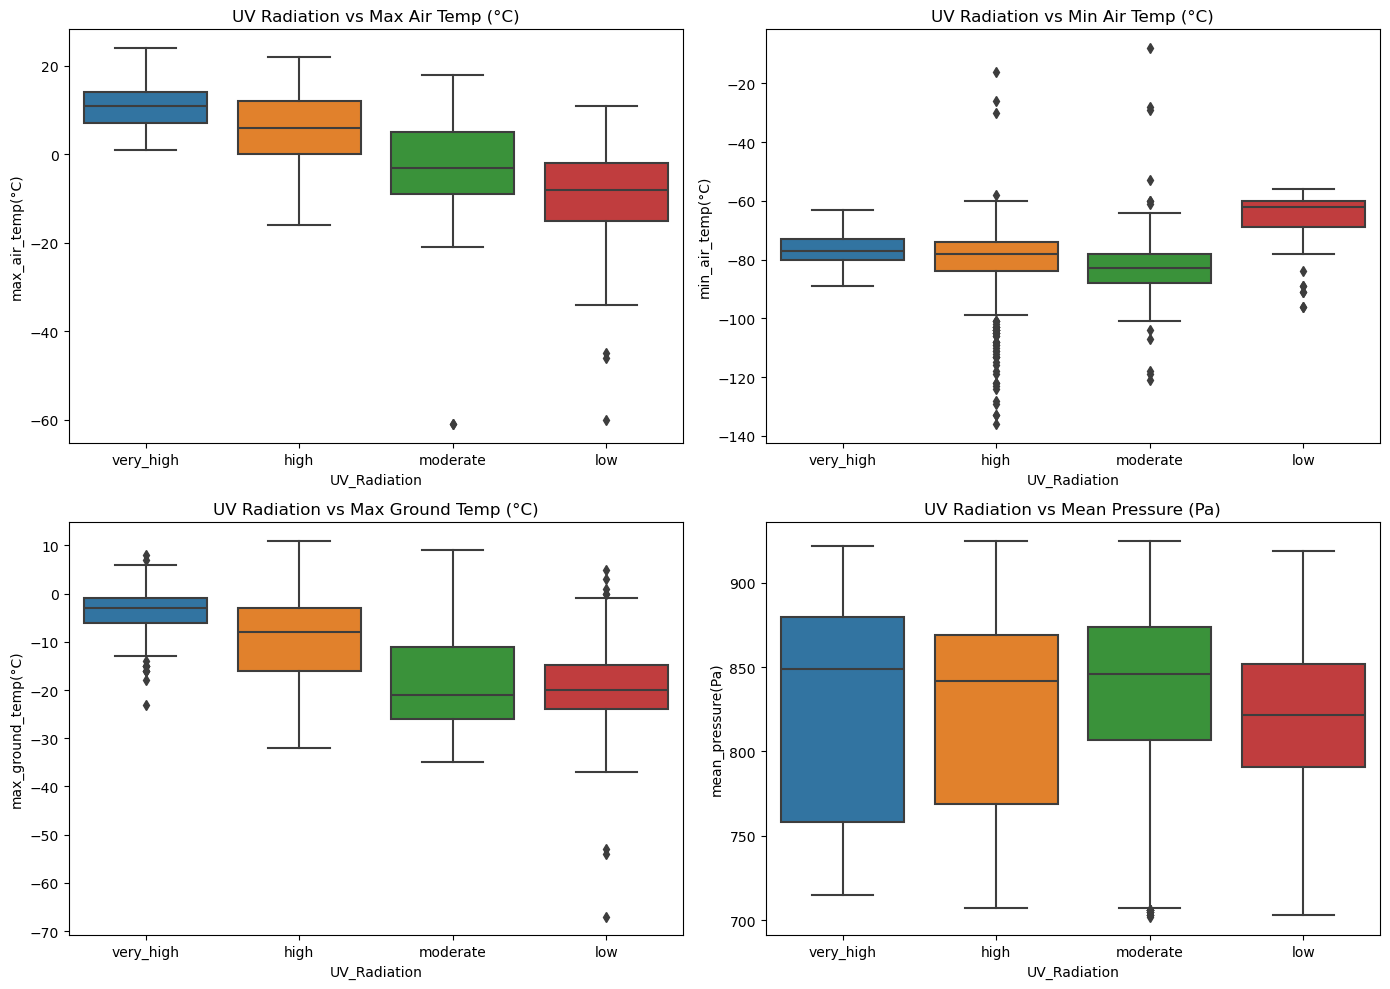

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 경로 설정
file_path = 'C:\\Users\\JY\\Desktop\\jy\\4grade\\수업\\데이터공학\\프로젝트\\marsTamsa\\REMS_Mars_Dataset_Cleaned.csv'  # 사용자 업로드 경로

# 데이터 불러오기
data_cleaned = pd.read_csv(file_path)

# 컬럼 이름 확인
print("Columns in the dataset:")
print(data_cleaned.columns)

# UV_Radiation 변수를 수치형으로 변환
uv_radiation_mapping = {'low': 1, 'moderate': 2, 'high': 3}
data_cleaned['UV_Radiation_numeric'] = data_cleaned['UV_Radiation'].map(uv_radiation_mapping)

# 데이터 요약
print(data_cleaned.describe())

# UV_Radiation과 다른 변수들 간의 관계 시각화
plt.figure(figsize=(14, 10))

# max_air_temp(°C) vs UV_Radiation
plt.subplot(2, 2, 1)
sns.boxplot(x='UV_Radiation', y='max_air_temp(°C)', data=data_cleaned)
plt.title('UV Radiation vs Max Air Temp (°C)')

# min_air_temp(°C) vs UV_Radiation
plt.subplot(2, 2, 2)
sns.boxplot(x='UV_Radiation', y='min_air_temp(°C)', data=data_cleaned)
plt.title('UV Radiation vs Min Air Temp (°C)')

# max_ground_temp(°C) vs UV_Radiation
plt.subplot(2, 2, 3)
sns.boxplot(x='UV_Radiation', y='max_ground_temp(°C)', data=data_cleaned)
plt.title('UV Radiation vs Max Ground Temp (°C)')

# mean_pressure(Pa) vs UV_Radiation
plt.subplot(2, 2, 4)
sns.boxplot(x='UV_Radiation', y='mean_pressure(Pa)', data=data_cleaned)
plt.title('UV Radiation vs Mean Pressure (Pa)')

plt.tight_layout()
plt.show()


In [142]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 데이터 경로 설정
file_path = 'C:\\Users\\JY\\Desktop\\jy\\4grade\\수업\\데이터공학\\프로젝트\\marsTamsa\\REMS_Mars_Dataset_Cleaned.csv'  # 사용자 업로드 경로

# 데이터 불러오기
data_cleaned = pd.read_csv(file_path)

# UV_Radiation 변수를 수치형으로 변환
uv_radiation_mapping = {'low': 1, 'moderate': 2, 'high': 3, 'very_high': 4}
data_cleaned['UV_Radiation_numeric'] = data_cleaned['UV_Radiation'].map(uv_radiation_mapping)

# 필요한 컬럼 선택
features = ['max_ground_temp(°C)', 'min_ground_temp(°C)', 'max_air_temp(°C)', 'min_air_temp(°C)', 'mean_pressure(Pa)']
target = 'UV_Radiation_numeric'

# 결측치가 없는 행들로 학습 데이터 준비
training_data = data_cleaned.dropna(subset=features + [target])

# 학습 데이터와 테스트 데이터 분리
X = training_data[features]
y = training_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# UV_Radiation 결측치가 있는 데이터 준비
missing_uv_data = data_cleaned[data_cleaned['UV_Radiation'].isna()]

# 결측치가 있는 데이터가 있는지 확인
if not missing_uv_data.empty:
    # 결측치 예측
    missing_uv_data['UV_Radiation_numeric'] = model.predict(missing_uv_data[features])
    
    # 예측된 값을 원래 데이터에 반영
    data_cleaned.loc[data_cleaned['UV_Radiation'].isna(), 'UV_Radiation_numeric'] = missing_uv_data['UV_Radiation_numeric']
    
    # UV_Radiation_numeric 값을 원래의 범주형 값으로 변환
    uv_radiation_inverse_mapping = {v: k for k, v in uv_radiation_mapping.items()}
    data_cleaned['UV_Radiation'] = data_cleaned['UV_Radiation_numeric'].map(uv_radiation_inverse_mapping)
else:
    print("No missing UV_Radiation values to predict.")

# UV_Radiation의 결측치 확인 (대체 후)
uv_radiation_missing_after = data_cleaned['UV_Radiation'].isna().sum()
print(f"UV_Radiation missing values after filling: {uv_radiation_missing_after}")

# 결과 확인
print(data_cleaned[['max_air_temp(°C)', 'min_air_temp(°C)', 'max_ground_temp(°C)', 'mean_pressure(Pa)', 'UV_Radiation']].head())

# 새로운 파일에 저장
output_file_path = 'C:\\Users\\JY\\Desktop\\jy\\4grade\\수업\\데이터공학\\프로젝트\\marsTamsa\\REMS_Mars_Dataset_Cleaned_UV_Filled.csv'
data_cleaned.to_csv(output_file_path, index=False)

print(f"Cleaned data saved to: {output_file_path}")


              precision    recall  f1-score   support

         1.0       1.00      0.75      0.86        20
         2.0       0.79      0.86      0.82       264
         3.0       0.78      0.77      0.77       282
         4.0       0.79      0.60      0.68        68

    accuracy                           0.79       634
   macro avg       0.84      0.75      0.78       634
weighted avg       0.79      0.79      0.79       634

UV_Radiation missing values after filling: 0
   max_air_temp(°C)  min_air_temp(°C)  max_ground_temp(°C)  mean_pressure(Pa)  \
0                 2               -79                  -14                845   
1                 2               -79                  -14                845   
2                 8               -83                  -16                739   
3                 9               -83                  -11                740   
4                 8               -82                  -18                741   

  UV_Radiation  
0         high  

C:\Users\JY\AppData\Local\Temp\ipykernel_18864\1800781481.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_uv_data['UV_Radiation_numeric'] = model.predict(missing_uv_data[features])


In [ ]:
#EDA 분석 기법 시작

In [143]:
import pandas as pd

# 데이터 파일 경로
file_path = 'C:\\Users\\JY\\Desktop\\jy\\4grade\\수업\\데이터공학\\프로젝트\\marsTamsa\\REMS_Mars_Dataset.csv'

# 데이터 불러오기
data = pd.read_csv(file_path)

# "Value not available"을 결측치로 처리
data = data.replace("Value not available", pd.NA)

# 데이터 타입 변환
data = data.convert_dtypes()

# 데이터 구조 확인
print(data.head())
print(data.info())
print(data.describe())


         earth_date_time           mars_date_time sol_number  \
0  Earth, 2022-01-26 UTC  Mars, Month 6 - LS 163°   Sol 3368   
1  Earth, 2022-01-25 UTC  Mars, Month 6 - LS 163°   Sol 3367   
2  Earth, 2022-01-24 UTC  Mars, Month 6 - LS 162°   Sol 3366   
3  Earth, 2022-01-23 UTC  Mars, Month 6 - LS 162°   Sol 3365   
4  Earth, 2022-01-22 UTC  Mars, Month 6 - LS 161°   Sol 3364   

  max_ground_temp(°C) min_ground_temp(°C) max_air_temp(°C) min_air_temp(°C)  \
0                  -3                 -71               10              -84   
1                  -3                 -72               10              -87   
2                  -4                 -70                8              -81   
3                  -6                 -70                9              -91   
4                  -7                 -71                8              -92   

  mean_pressure(Pa) wind_speed(m/h) humidity(%) sunrise sunset UV_Radiation  \
0               707            <NA>        <NA>   05:25  17:2

In [144]:
import pandas as pd

# 데이터 파일 경로
file_path = 'C:\\Users\\JY\\Desktop\\jy\\4grade\\수업\\데이터공학\\프로젝트\\marsTamsa\\REMS_Mars_Dataset_Cleaned_last.csv'

# 데이터 불러오기
data = pd.read_csv(file_path)

# 데이터 구조 확인
print(data.head())
print(data.info())
print(data.describe())


  earth_date_time           mars_date_time sol_number  max_ground_temp(°C)  \
0      2012-08-07  Mars, Month 6 - LS 150°      Sol 1                  -14   
1      2012-08-15  Mars, Month 6 - LS 155°      Sol 9                  -14   
2      2012-08-16  Mars, Month 6 - LS 155°     Sol 10                  -16   
3      2012-08-17  Mars, Month 6 - LS 156°     Sol 11                  -11   
4      2012-08-18  Mars, Month 6 - LS 156°     Sol 12                  -18   

   min_ground_temp(°C)  max_air_temp(°C)  min_air_temp(°C)  mean_pressure(Pa)  \
0                  -75                 2               -79                845   
1                  -75                 2               -79                845   
2                  -75                 8               -83                739   
3                  -76                 9               -83                740   
4                  -76                 8               -82                741   

  sunrise sunset UV_Radiation weather  
0   

In [87]:
# 각 변수의 기본 통계량 확인
print(data.describe())

       max_ground_temp(°C)  min_ground_temp(°C)  max_air_temp(°C)  \
count          3197.000000          3197.000000       3197.000000   
mean            -13.208320           -75.015952          2.015327   
std              10.448144             5.505095          9.359398   
min             -67.000000          -100.000000        -61.000000   
25%             -23.000000           -79.000000         -6.000000   
50%             -12.000000           -75.000000          3.000000   
75%              -4.000000           -71.000000          9.000000   
max              11.000000           -52.000000         24.000000   

       min_air_temp(°C)  mean_pressure(Pa)  
count       3197.000000        3197.000000  
mean         -80.315921         828.789803  
std            8.805415          56.900069  
min         -136.000000         702.000000  
25%          -86.000000         786.000000  
50%          -80.000000         843.000000  
75%          -75.000000         873.000000  
max           -8.0

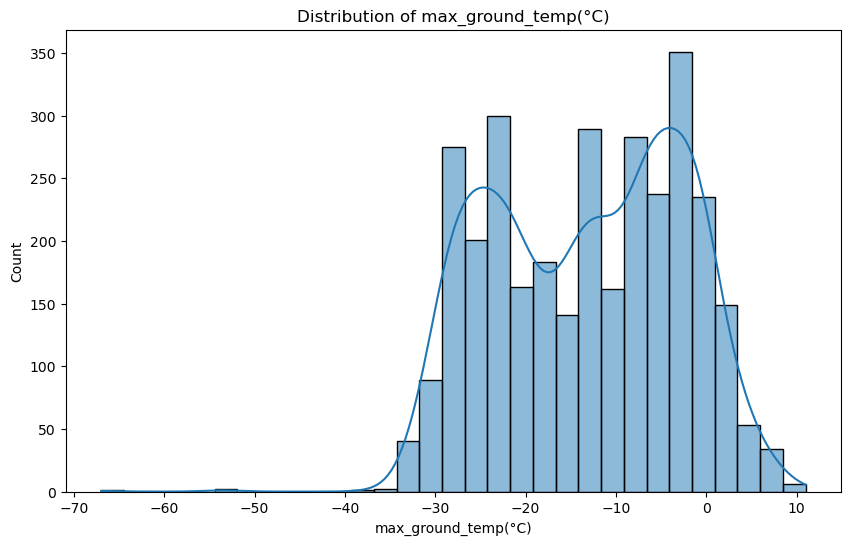

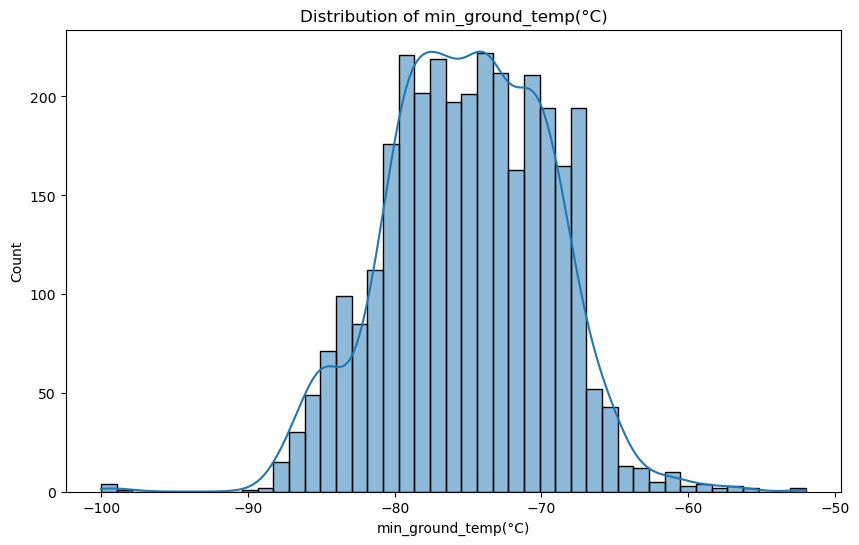

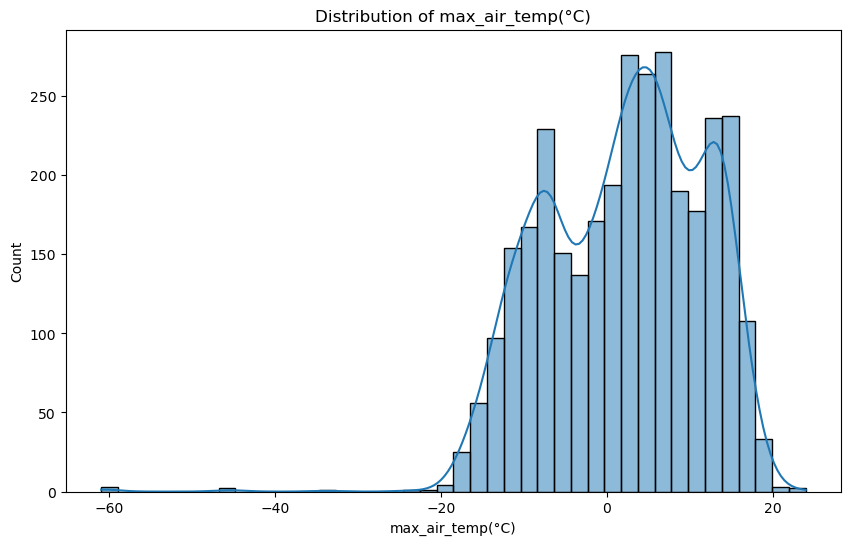

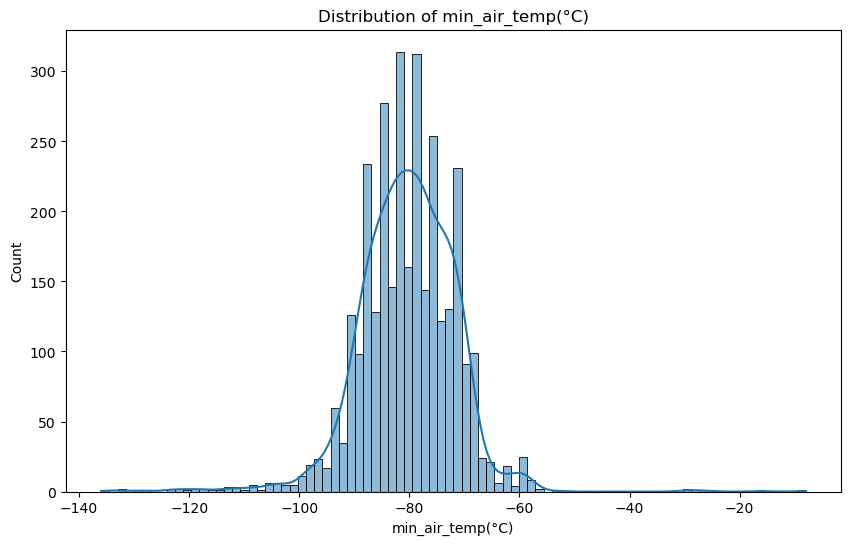

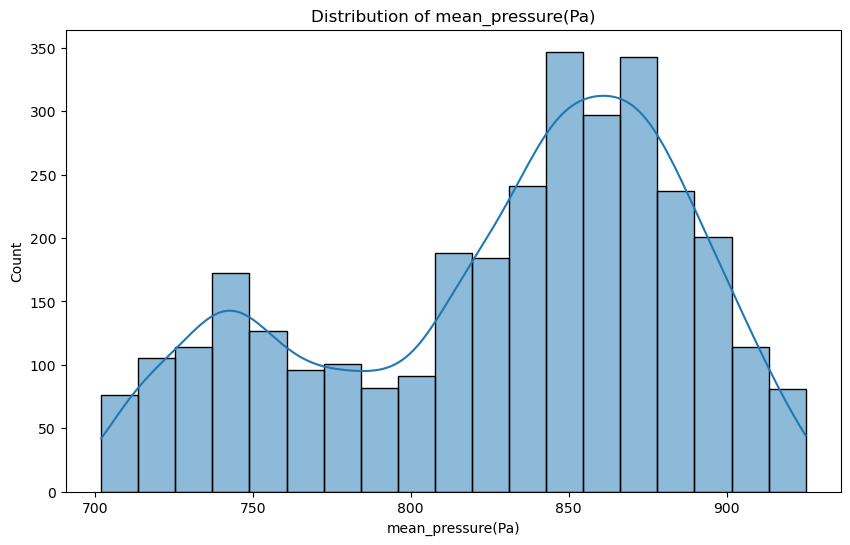

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 변수의 분포 시각화
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


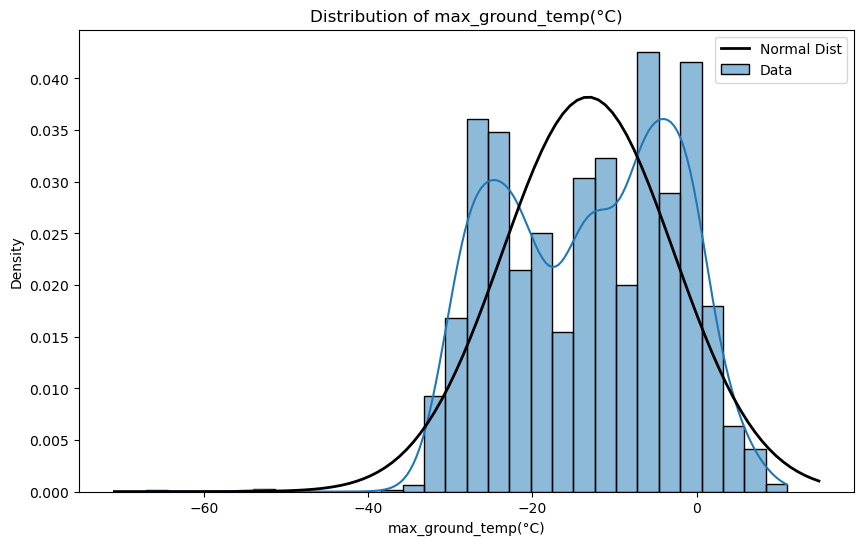

Mean: -13.208320300281514, Variance: 109.1637229912426, Standard Deviation: 10.448144475993935
Shapiro-Wilk Test: Statistics=0.961, p=0.000
Kolmogorov-Smirnov Test: Statistics=0.094, p=0.000


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, shapiro, kstest, probplot

# 데이터 파일 경로
file_path = 'C:\\Users\\JY\\Desktop\\jy\\4grade\\수업\\데이터공학\\프로젝트\\marsTamsa\\REMS_Mars_Dataset_Cleaned_last.csv'

# 데이터 불러오기
data = pd.read_csv(file_path)

# 데이터 타입 변환 및 결측치 처리
data = data.apply(pd.to_numeric, errors='coerce')  # 모든 열을 수치형으로 변환
data = data.replace([np.inf, -np.inf], np.nan)  # inf 값을 NaN으로 변환
data = data.dropna(subset=['max_ground_temp(°C)'])  # max_ground_temp(°C) 열의 NaN 값 제거

# max_ground_temp(°C) 데이터
max_ground_temp_data = data['max_ground_temp(°C)']

# 평균, 분산, 표준편차 계산
mean = max_ground_temp_data.mean()
variance = max_ground_temp_data.var()
std_dev = max_ground_temp_data.std()

# 데이터 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(max_ground_temp_data, kde=True, stat='density', bins=30, label='Data')

# 정규 분포 적합
mu, std = norm.fit(max_ground_temp_data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Dist')

plt.title(f'Distribution of max_ground_temp(°C)')
plt.legend()
plt.show()

# 정규성 검정
print(f"Mean: {mean}, Variance: {variance}, Standard Deviation: {std_dev}")
stat, p = shapiro(max_ground_temp_data)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))
stat, p = kstest(max_ground_temp_data, 'norm', args=(mu, std))
print('Kolmogorov-Smirnov Test: Statistics=%.3f, p=%.3f' % (stat, p))


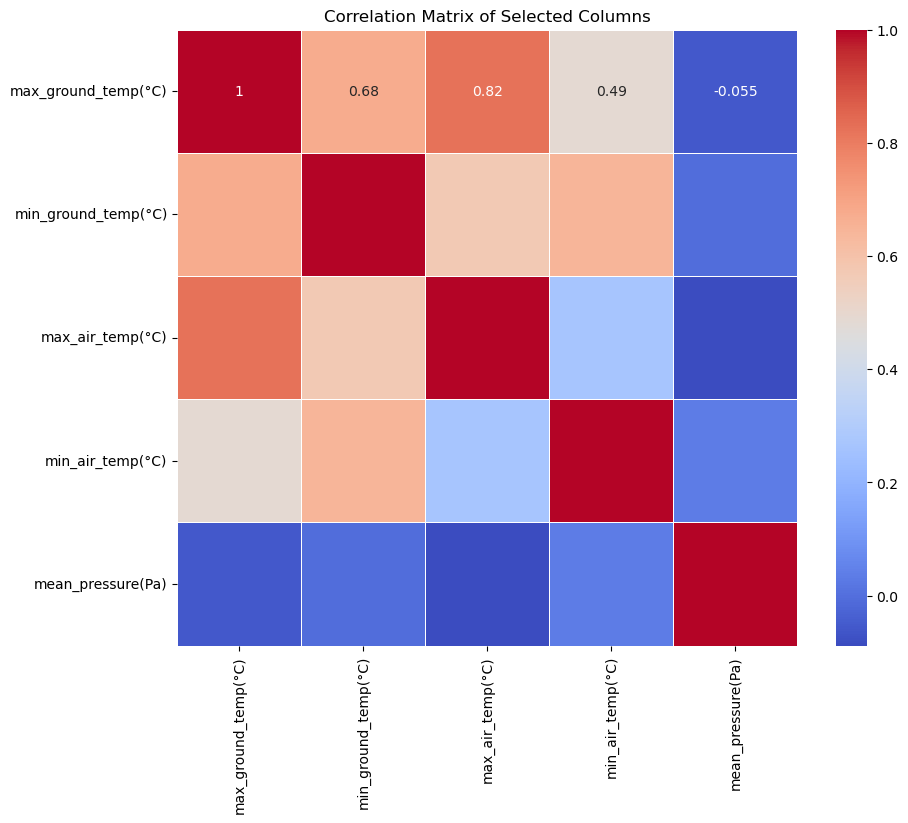

max_ground_temp(°C)    1.000000
min_ground_temp(°C)    0.675200
max_air_temp(°C)       0.822014
min_air_temp(°C)       0.489485
mean_pressure(Pa)     -0.055435
Name: max_ground_temp(°C), dtype: float64
X shape: (3197, 4), y shape: (3197,)
X head:
   min_ground_temp(°C)  max_air_temp(°C)  min_air_temp(°C)  mean_pressure(Pa)
0                  -75                 2               -79                845
1                  -75                 2               -79                845
2                  -75                 8               -83                739
3                  -76                 9               -83                740
4                  -76                 8               -82                741
y head:
0   -14
1   -14
2   -16
3   -11
4   -18
Name: max_ground_temp(°C), dtype: int64


In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 데이터 파일 경로
file_path = 'C:\\Users\\JY\\Desktop\\jy\\4grade\\수업\\데이터공학\\프로젝트\\marsTamsa\\REMS_Mars_Dataset_Cleaned_last.csv'

# 데이터 불러오기
data = pd.read_csv(file_path)

# 선택된 컬럼들만 사용하여 상관 행렬 계산
selected_columns = ['max_ground_temp(°C)', 'min_ground_temp(°C)', 'max_air_temp(°C)', 'min_air_temp(°C)', 'mean_pressure(Pa)']
correlation_matrix = data[selected_columns].corr()

# 상관 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Selected Columns')
plt.show()

# max_ground_temp(°C)와 다른 변수들 간의 상관 관계
print(correlation_matrix['max_ground_temp(°C)'])

# 회귀 분석: max_ground_temp(°C) ~ min_ground_temp(°C) + max_air_temp(°C) + min_air_temp(°C) + mean_pressure(Pa)
X = data[['min_ground_temp(°C)', 'max_air_temp(°C)', 'min_air_temp(°C)', 'mean_pressure(Pa)']]
y = data['max_ground_temp(°C)']

# 데이터 전처리 확인
print(f'X shape: {X.shape}, y shape: {y.shape}')
print(f'X head:\n{X.head()}')
print(f'y head:\n{y.head()}')

# 상수항 추가
X = sm.add_constant(X)




Mean: -75.01595245542697
Variance: 30.306065840041956
Standard Deviation: 5.505094535068581


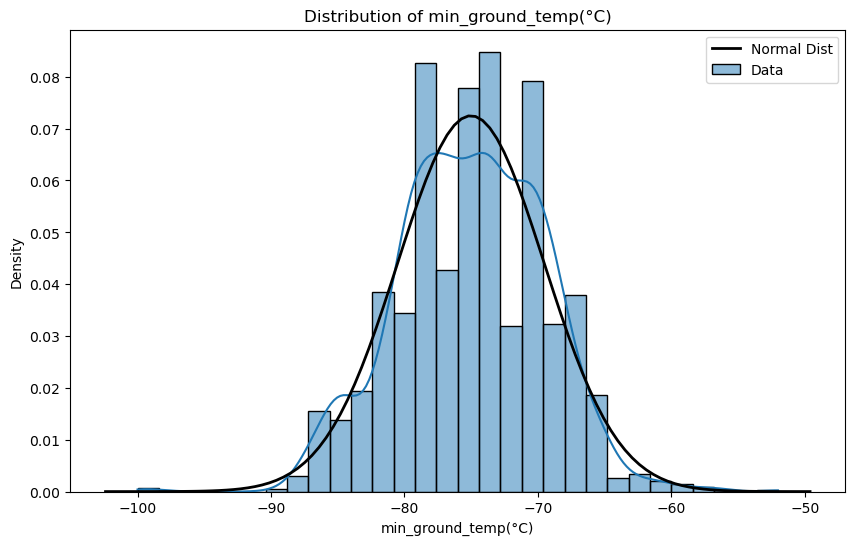

Shapiro-Wilk Test: Statistics=0.991182267665863, p=3.7531268240811877e-13
Kolmogorov-Smirnov Test: Statistics=0.05339199493951419, p=2.3175209470722312e-08


In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro, kstest, probplot

# 데이터 파일 경로
file_path = 'C:\\Users\\JY\\Desktop\\jy\\4grade\\수업\\데이터공학\\프로젝트\\marsTamsa\\REMS_Mars_Dataset_Cleaned_last.csv'

# 데이터 불러오기
data = pd.read_csv(file_path)

# min_ground_temp(°C) 데이터 분포 확인
min_ground_temp_data = data['min_ground_temp(°C)']

# 평균, 분산, 표준편차 계산
mean = min_ground_temp_data.mean()
variance = min_ground_temp_data.var()
std_dev = min_ground_temp_data.std()

print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")

# 데이터 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(min_ground_temp_data, kde=True, stat='density', bins=30, label='Data')

# 정규 분포 적합
mu, std = norm.fit(min_ground_temp_data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Dist')

plt.title('Distribution of min_ground_temp(°C)')
plt.legend()
plt.show()

# 정규성 검정
shapiro_test = shapiro(min_ground_temp_data)
ks_test = kstest(min_ground_temp_data, 'norm', args=(mu, std))

print(f"Shapiro-Wilk Test: Statistics={shapiro_test[0]}, p={shapiro_test[1]}")
print(f"Kolmogorov-Smirnov Test: Statistics={ks_test[0]}, p={ks_test[1]}")


Mean: 2.015326868939631
Variance: 87.59832571446299
Standard Deviation: 9.359397721780125


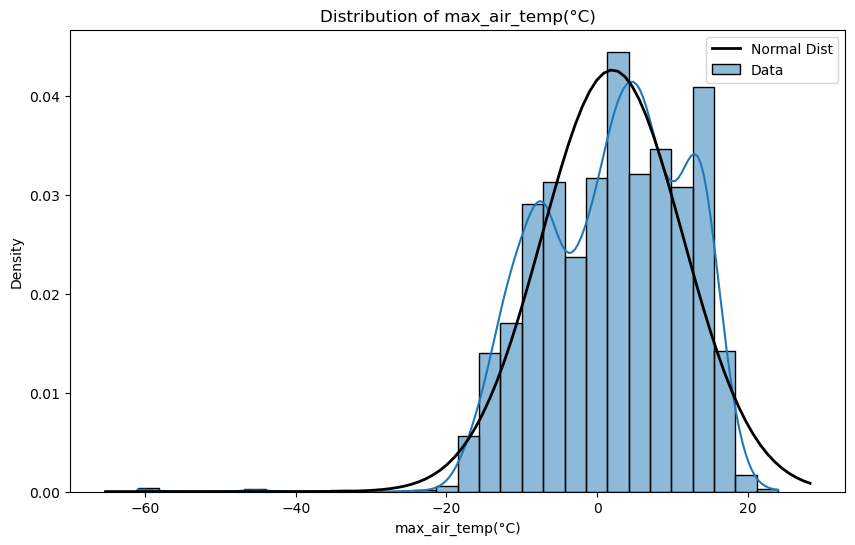

Shapiro-Wilk Test: Statistics=0.9592366218566895, p=4.5189869751825197e-29
Kolmogorov-Smirnov Test: Statistics=0.06379073039677571, p=9.402630431941385e-12


In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro, kstest, probplot

# 데이터 파일 경로
file_path = 'C:\\Users\\JY\\Desktop\\jy\\4grade\\수업\\데이터공학\\프로젝트\\marsTamsa\\REMS_Mars_Dataset_Cleaned_last.csv'

# 데이터 불러오기
data = pd.read_csv(file_path)
# max_air_temp(°C) 데이터 분포 확인
max_air_temp_data = data['max_air_temp(°C)']

# 평균, 분산, 표준편차 계산
mean = max_air_temp_data.mean()
variance = max_air_temp_data.var()
std_dev = max_air_temp_data.std()

print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")

# 데이터 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(max_air_temp_data, kde=True, stat='density', bins=30, label='Data')

# 정규 분포 적합
mu, std = norm.fit(max_air_temp_data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Dist')

plt.title('Distribution of max_air_temp(°C)')
plt.legend()
plt.show()

# 정규성 검정
shapiro_test = shapiro(max_air_temp_data)
ks_test = kstest(max_air_temp_data, 'norm', args=(mu, std))

print(f"Shapiro-Wilk Test: Statistics={shapiro_test[0]}, p={shapiro_test[1]}")
print(f"Kolmogorov-Smirnov Test: Statistics={ks_test[0]}, p={ks_test[1]}")


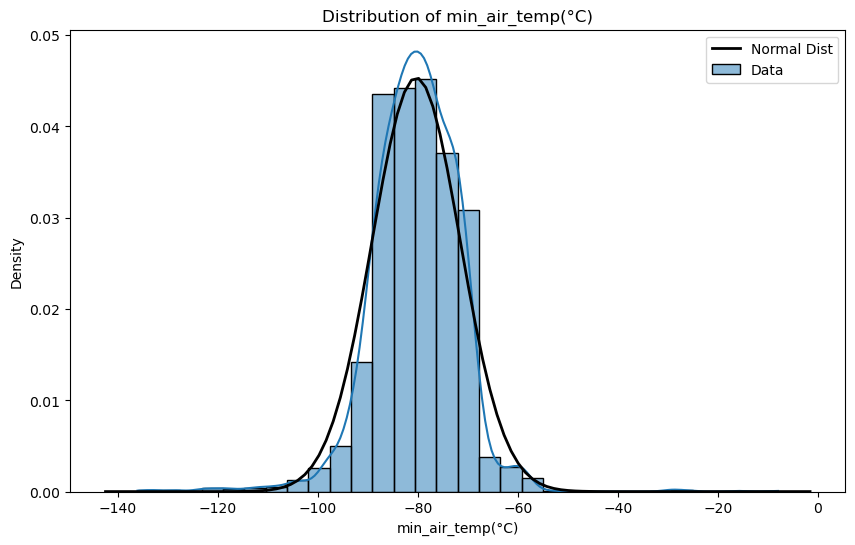

Mean: -80.31592117610259
Variance: 77.51107901536965
Standard Deviation: 8.804037654131747
Shapiro-Wilk Test: Statistics=0.938289225101471, p=1.5228420260251047e-34
Kolmogorov-Smirnov Test: Statistics=0.05499938116219416, p=7.58841011245684e-09


In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# 데이터 파일 경로
file_path = 'C:\\Users\\JY\\Desktop\\jy\\4grade\\수업\\데이터공학\\프로젝트\\marsTamsa\\REMS_Mars_Dataset_Cleaned_last.csv'

# 데이터 불러오기
data = pd.read_csv(file_path)

# 'min_air_temp(°C)' 컬럼의 데이터 분포 확인
min_air_temp_data = data['min_air_temp(°C)'].dropna()

# 평균, 분산, 표준편차 계산
mean_min_air_temp = np.mean(min_air_temp_data)
variance_min_air_temp = np.var(min_air_temp_data)
std_dev_min_air_temp = np.std(min_air_temp_data)

# 데이터 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(min_air_temp_data, kde=True, stat='density', bins=30, label='Data')

# 정규 분포 적합
mu, std = stats.norm.fit(min_air_temp_data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Dist')
plt.title('Distribution of min_air_temp(°C)')
plt.legend()
plt.show()

# 정규성 검정
shapiro_test = stats.shapiro(min_air_temp_data)
ks_test = stats.kstest(min_air_temp_data, 'norm', args=(mu, std))

print(f"Mean: {mean_min_air_temp}")
print(f"Variance: {variance_min_air_temp}")
print(f"Standard Deviation: {std_dev_min_air_temp}")
print(f"Shapiro-Wilk Test: Statistics={shapiro_test[0]}, p={shapiro_test[1]}")
print(f"Kolmogorov-Smirnov Test: Statistics={ks_test[0]}, p={ks_test[1]}")


Mean: 828.7898029402564
Variance: 3237.6178809686626
Standard Deviation: 56.90006925275806


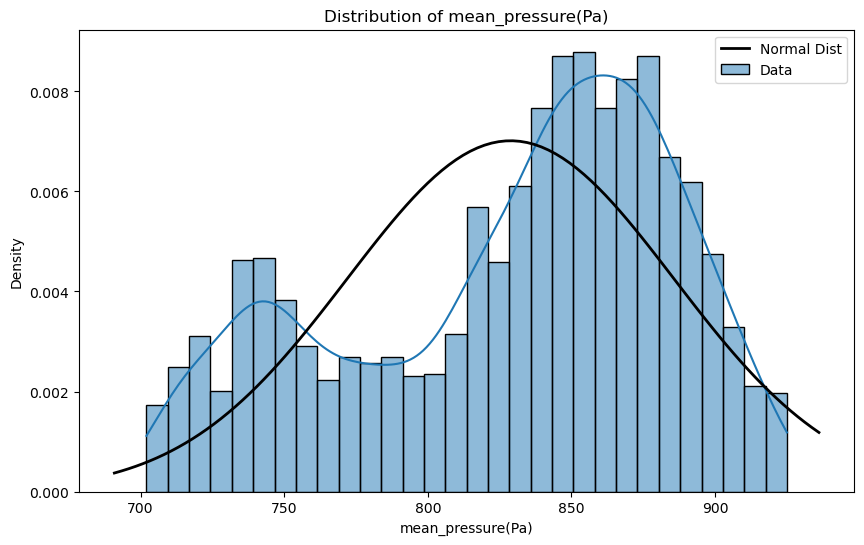

Shapiro-Wilk Test: Statistics=0.9370394945144653, p=8.044665485520217e-35
Kolmogorov-Smirnov Test: Statistics=0.10985287914446717, p=4.683642526031019e-34


In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro, kstest
import statsmodels.api as sm

# 데이터 파일 경로
file_path = 'C:\\Users\\JY\\Desktop\\jy\\4grade\\수업\\데이터공학\\프로젝트\\marsTamsa\\REMS_Mars_Dataset_Cleaned_last.csv'

# 데이터 불러오기
data = pd.read_csv(file_path)

# mean_pressure(Pa) 컬럼의 데이터 분포 확인
mean_pressure_data = data['mean_pressure(Pa)'].dropna()

# 평균, 분산, 표준편차 계산
mean_pressure_mean = mean_pressure_data.mean()
mean_pressure_variance = mean_pressure_data.var()
mean_pressure_std = mean_pressure_data.std()

print(f"Mean: {mean_pressure_mean}")
print(f"Variance: {mean_pressure_variance}")
print(f"Standard Deviation: {mean_pressure_std}")

# 데이터 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(mean_pressure_data, kde=True, stat='density', bins=30, label='Data')

# 정규 분포 적합
mu, std = norm.fit(mean_pressure_data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Dist')
plt.legend(loc='upper right')
plt.title('Distribution of mean_pressure(Pa)')
plt.show()

# 정규성 검정
shapiro_test = shapiro(mean_pressure_data)
kstest_test = kstest(mean_pressure_data, 'norm', args=(mu, std))

print(f"Shapiro-Wilk Test: Statistics={shapiro_test[0]}, p={shapiro_test[1]}")
print(f"Kolmogorov-Smirnov Test: Statistics={kstest_test[0]}, p={kstest_test[1]}")


                  ground_temp_range                        air_temp_range  \
                               mean        std         var           mean   
pressure_category                                                           
low                       64.246939   5.598919   31.347894      83.602041   
medium                    60.966825  10.368912  107.514336      80.447867   
high                      61.717949   7.863203   61.829957      85.221851   
very_high                 61.260086   7.493093   56.146437      80.587176   

                                          
                         std         var  
pressure_category                         
low                10.108349  102.178728  
medium             12.874172  165.744307  
high               11.617742  134.971933  
very_high           9.745812   94.980859  
Correlation between pressure and ground temperature range: -0.06991640443317212
Correlation between pressure and air temperature range: -0.10119048567944967
  

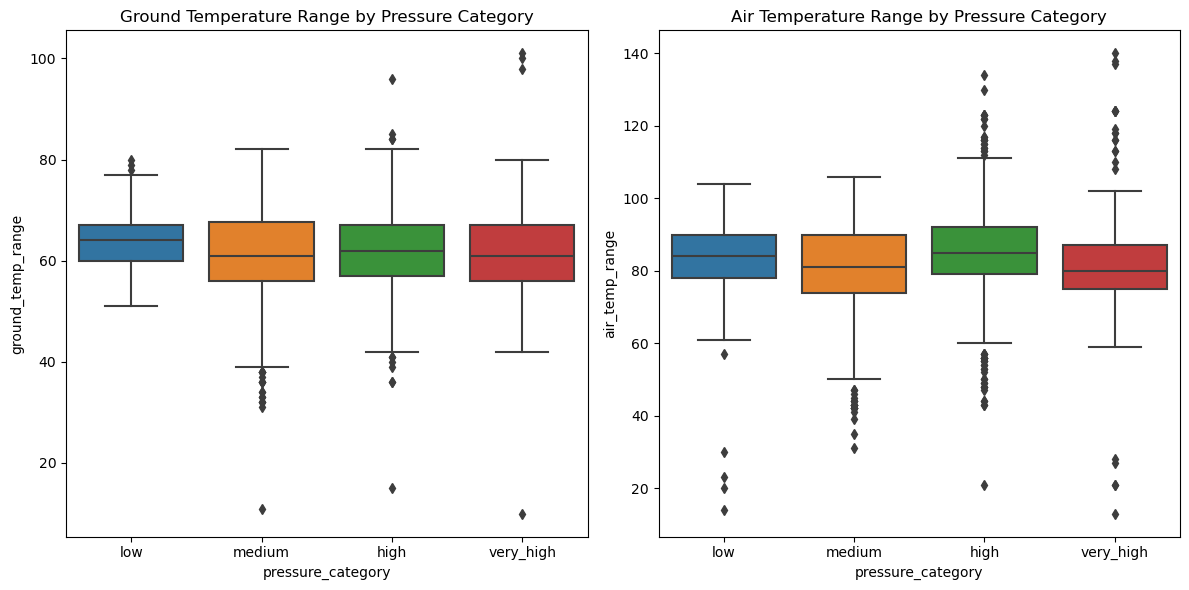

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr

# 데이터 파일 경로
file_path = 'C:\\Users\\JY\\Desktop\\jy\\4grade\\수업\\데이터공학\\프로젝트\\marsTamsa\\REMS_Mars_Dataset_Cleaned_last.csv'

# 데이터 불러오기
data = pd.read_csv(file_path)

# 온도 변화 폭 계산
data['ground_temp_range'] = data['max_ground_temp(°C)'] - data['min_ground_temp(°C)']
data['air_temp_range'] = data['max_air_temp(°C)'] - data['min_air_temp(°C)']

# 기압 범주화
data['pressure_category'] = pd.cut(data['mean_pressure(Pa)'], bins=[0, 750, 800, 850, np.inf], labels=['low', 'medium', 'high', 'very_high'])

# 기압 범주별 온도 변화 폭 통계 분석
pressure_groups = data.groupby('pressure_category').agg({
    'ground_temp_range': ['mean', 'std', 'var'],
    'air_temp_range': ['mean', 'std', 'var']
})
print(pressure_groups)

# 상관 분석
corr_ground_temp_range, _ = pearsonr(data['mean_pressure(Pa)'], data['ground_temp_range'])
corr_air_temp_range, _ = pearsonr(data['mean_pressure(Pa)'], data['air_temp_range'])
print(f'Correlation between pressure and ground temperature range: {corr_ground_temp_range}')
print(f'Correlation between pressure and air temperature range: {corr_air_temp_range}')

# 회귀 분석
X = sm.add_constant(data['mean_pressure(Pa)'])
y_ground = data['ground_temp_range']
y_air = data['air_temp_range']

model_ground = sm.OLS(y_ground, X).fit()
model_air = sm.OLS(y_air, X).fit()

print(model_ground.summary())
print(model_air.summary())

# 결과 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='pressure_category', y='ground_temp_range', data=data)
plt.title('Ground Temperature Range by Pressure Category')

plt.subplot(1, 2, 2)
sns.boxplot(x='pressure_category', y='air_temp_range', data=data)
plt.title('Air Temperature Range by Pressure Category')

plt.tight_layout()
plt.show()

plt.show()


<Figure size 1400x700 with 0 Axes>

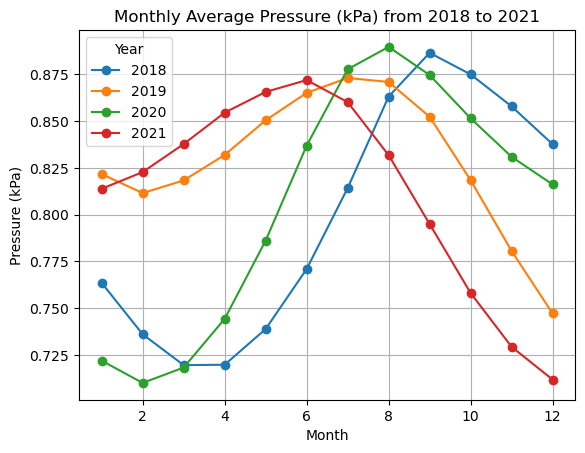

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 경로
file_path = 'C:\\Users\\JY\\Desktop\\jy\\4grade\\수업\\데이터공학\\프로젝트\\marsTamsa\\REMS_Mars_Dataset_Cleaned_last.csv'

# 데이터 불러오기
data = pd.read_csv(file_path)

# 필요한 컬럼 선택
data = data[['earth_date_time', 'mean_pressure(Pa)']]

# 날짜 형식 변환
data['earth_date_time'] = pd.to_datetime(data['earth_date_time'], errors='coerce')

# Pa를 kPa로 변환
data['mean_pressure(kPa)'] = data['mean_pressure(Pa)'] / 1000

# 연도와 월 컬럼 추가
data['year'] = data['earth_date_time'].dt.year
data['month'] = data['earth_date_time'].dt.month

# 2018년부터 2021년까지의 데이터 필터링
data_filtered = data[(data['year'] >= 2018) & (data['year'] <= 2021)]

# 월별 평균 기압 계산
monthly_avg_pressure = data_filtered.groupby(['year', 'month'])['mean_pressure(kPa)'].mean().unstack(level=0)

# 시각화
plt.figure(figsize=(14, 7))
monthly_avg_pressure.plot(kind='line', marker='o')
plt.title('Monthly Average Pressure (kPa) from 2018 to 2021')
plt.xlabel('Month')
plt.ylabel('Pressure (kPa)')
plt.grid(True)
plt.legend(title='Year')
plt.show()


<Figure size 1400x700 with 0 Axes>

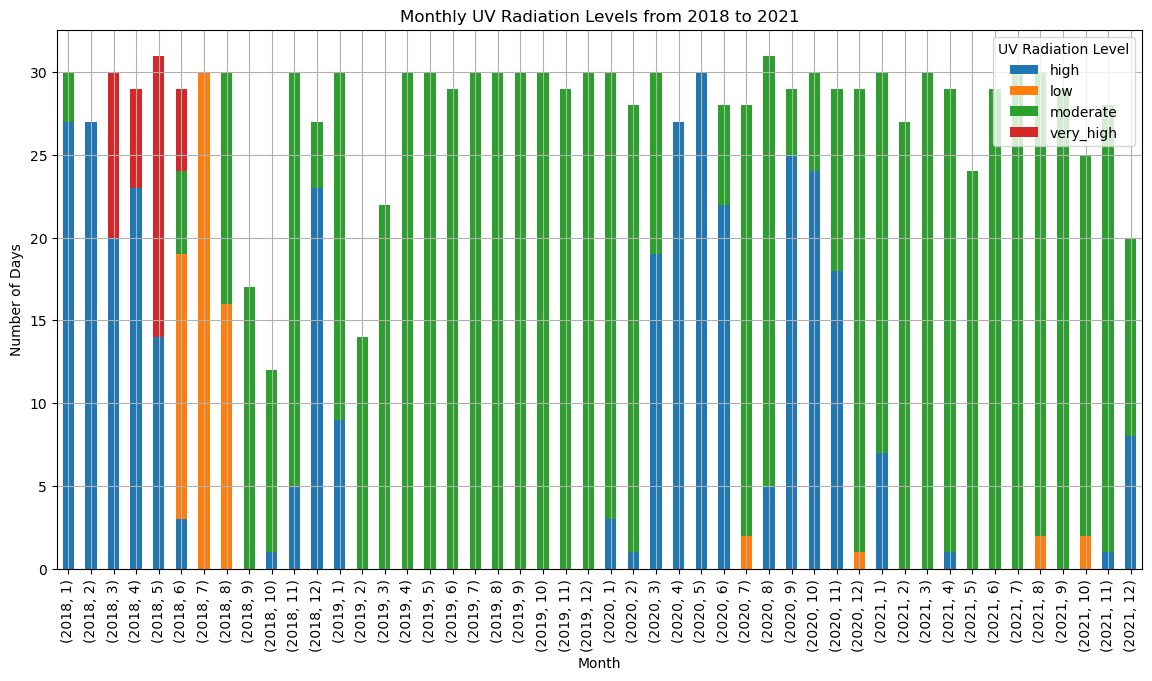

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 경로
file_path = 'C:\\Users\\JY\\Desktop\\jy\\4grade\\수업\\데이터공학\\프로젝트\\marsTamsa\\REMS_Mars_Dataset_Cleaned_last.csv'

# 데이터 불러오기
data = pd.read_csv(file_path)

# 필요한 컬럼 선택
data = data[['earth_date_time', 'UV_Radiation']]

# 날짜 형식 변환
data['earth_date_time'] = pd.to_datetime(data['earth_date_time'], errors='coerce')

# 연도와 월 컬럼 추가
data['year'] = data['earth_date_time'].dt.year
data['month'] = data['earth_date_time'].dt.month

# 2018년부터 2021년까지의 데이터 필터링
data_filtered = data[(data['year'] >= 2018) & (data['year'] <= 2021)]

# UV Radiation 등급별 월별 개수 계산
uv_radiation_counts = data_filtered.groupby(['year', 'month', 'UV_Radiation']).size().unstack(fill_value=0)

# 시각화
plt.figure(figsize=(14, 7))
uv_radiation_counts.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Monthly UV Radiation Levels from 2018 to 2021')
plt.xlabel('Month')
plt.ylabel('Number of Days')
plt.grid(True)
plt.legend(title='UV Radiation Level')
plt.show()


In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 경로
file_path = 'C:\\Users\\JY\\Desktop\\jy\\4grade\\수업\\데이터공학\\프로젝트\\marsTamsa\\REMS_Mars_Dataset_Cleaned_last.csv'

# 데이터 불러오기
data = pd.read_csv(file_path)

# 필요한 컬럼 선택
data = data[['earth_date_time', 'max_air_temp(°C)', 'min_air_temp(°C)', 'mean_pressure(Pa)', 'UV_Radiation']]

# 날짜 형식 변환
data['earth_date_time'] = pd.to_datetime(data['earth_date_time'], errors='coerce')

# Pa를 kPa로 변환
data['mean_pressure(kPa)'] = data['mean_pressure(Pa)'] / 1000

# 연도와 월 컬럼 추가
data['year'] = data['earth_date_time'].dt.year
data['month'] = data['earth_date_time'].dt.month

# 결측값 처리
data = data.dropna()

# 온도 조건: -10°C <= max_air_temp <= 30°C
temperature_condition = (data['max_air_temp(°C)'] >= -10) & (data['max_air_temp(°C)'] <= 30)

# 기압 조건: 60 kPa <= mean_pressure <= 101.3 kPa
pressure_condition = (data['mean_pressure(kPa)'] >= 60) & (data['mean_pressure(kPa)'] <= 101.3)

# 자외선 방사선 조건: low 또는 moderate
uv_condition = data['UV_Radiation'].isin(['low', 'moderate'])

# 모든 조건을 만족하는 데이터 필터링
survivable_conditions = data[temperature_condition & pressure_condition & uv_condition]

# 조건 충족 데이터 개수 확인
print(f"Number of days with survivable conditions: {len(survivable_conditions)}")

# 월별로 조건을 충족하는 데이터 개수 확인
survivable_conditions['month'] = survivable_conditions['earth_date_time'].dt.month
monthly_survivable_counts = survivable_conditions.groupby(['year', 'month']).size().unstack(level=0, fill_value=0)

# 결과 출력
print(monthly_survivable_counts)

# 시각화
plt.figure(figsize=(14, 7))
monthly_survivable_counts.plot(kind='bar', stacked=True)
plt.title('Monthly Count of Days with Survivable Conditions (2018-2021)')
plt.xlabel('Month')
plt.ylabel('Number of Days')
plt.grid(True)
plt.legend(title='Year')
plt.show()


Number of days with survivable conditions: 0
Empty DataFrame
Columns: []
Index: []


TypeError: no numeric data to plot

<Figure size 1400x700 with 0 Axes>

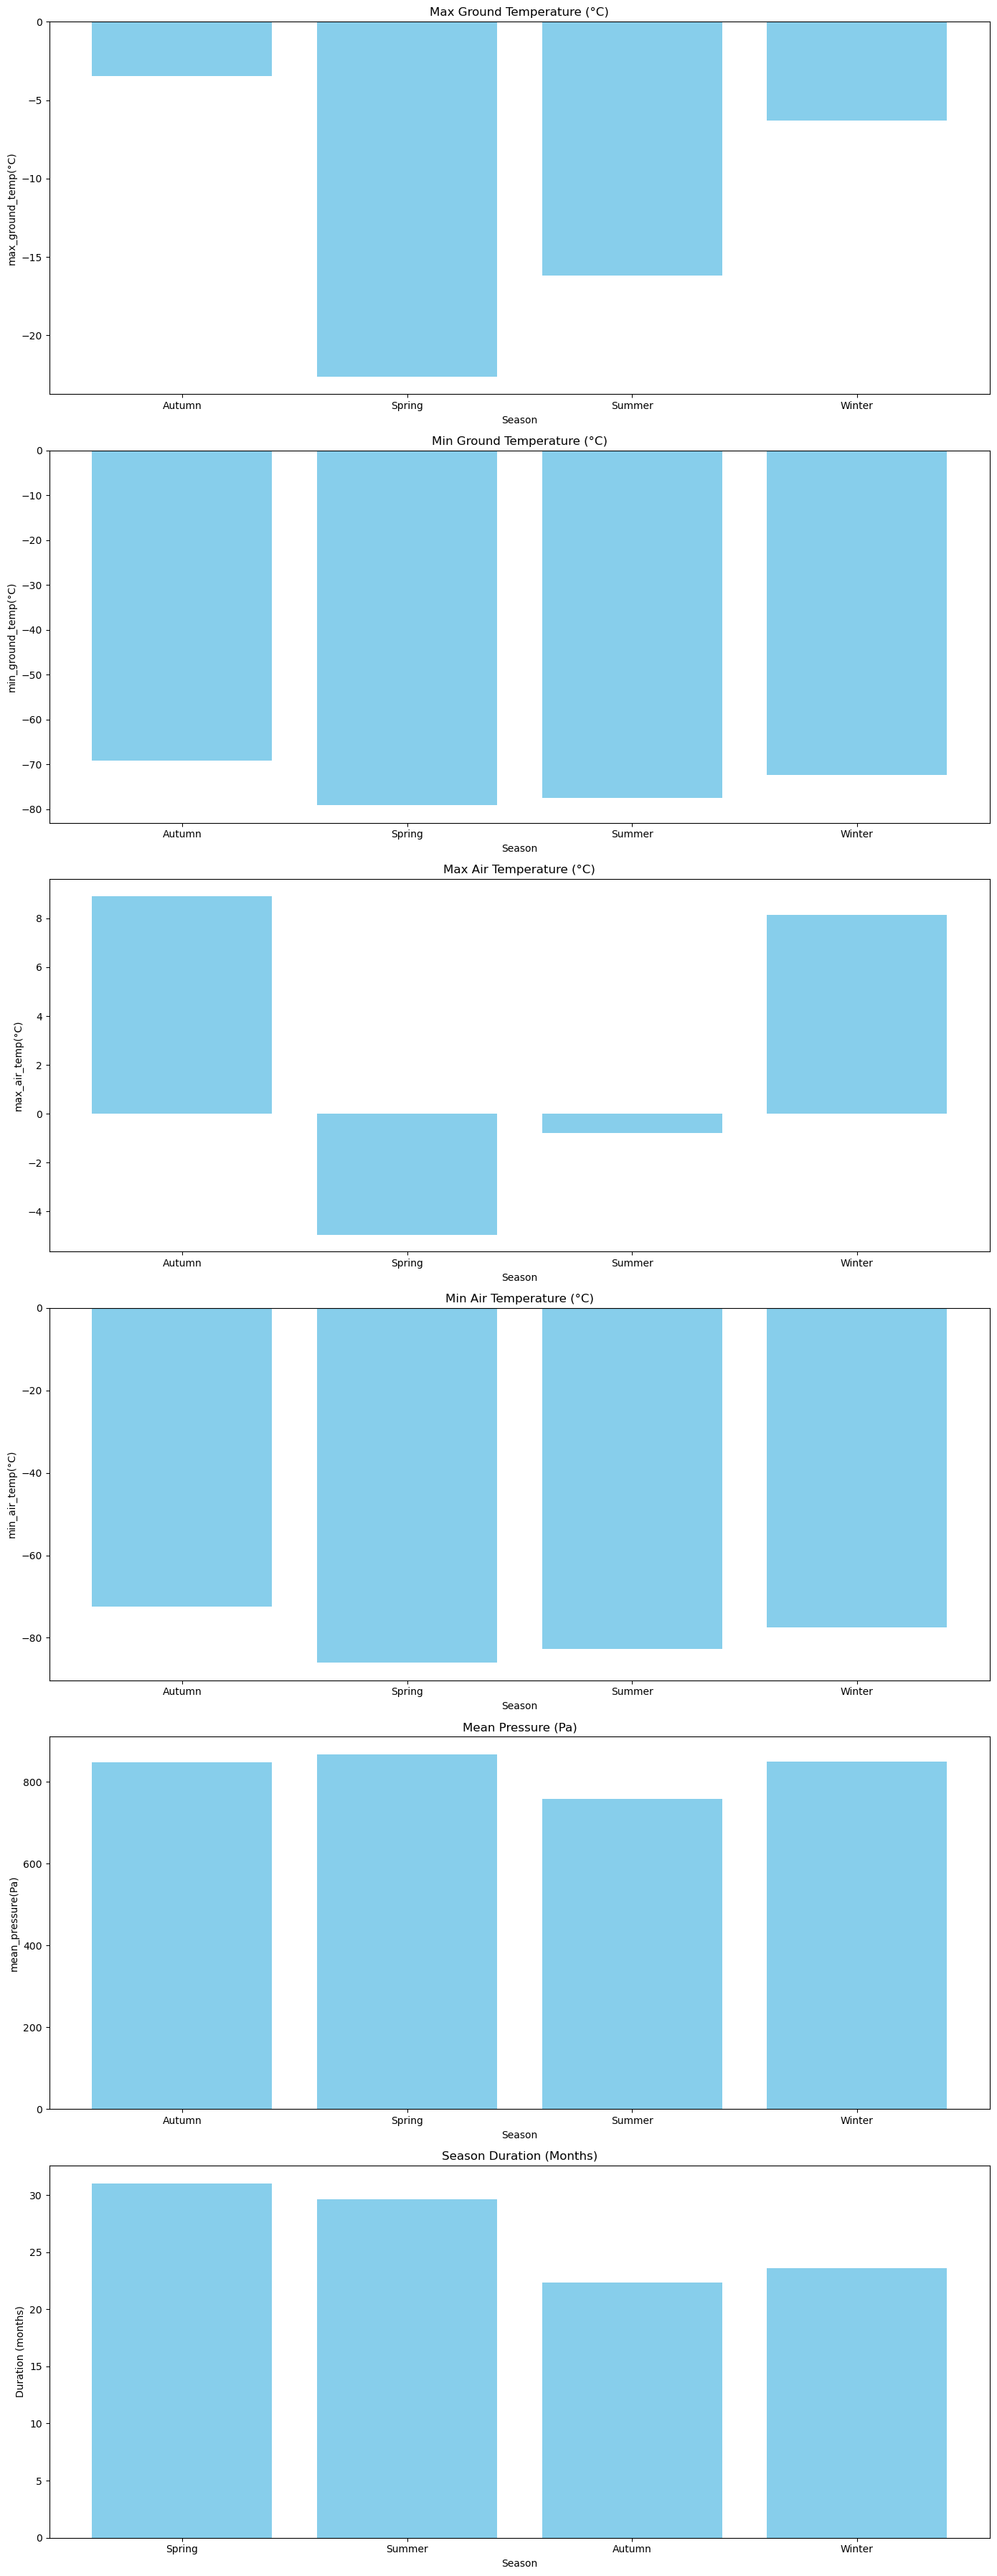

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the dataset
file_path = 'C:\\Users\\JY\\Desktop\\jy\\4grade\\수업\\데이터공학\\프로젝트\\marsTamsa\\REMS_Mars_Dataset_Cleaned_last.csv'
mars_data = pd.read_csv(file_path)

# Function to extract Ls from the mars_date_time column
def extract_ls(date_str):
    match = re.search(r'LS (\d+°)', date_str)
    if match:
        return int(match.group(1).replace('°', ''))
    return None

# Extract Ls values and add them as a new column
mars_data['Ls'] = mars_data['mars_date_time'].apply(extract_ls)

# Define seasons based on Ls
def define_season(ls):
    if 0 <= ls < 90:
        return 'Spring'
    elif 90 <= ls < 180:
        return 'Summer'
    elif 180 <= ls < 270:
        return 'Autumn'
    elif 270 <= ls < 360:
        return 'Winter'
    else:
        return 'Unknown'

# Add a season column based on Ls
mars_data['Season'] = mars_data['Ls'].apply(define_season)

# Calculate the number of data points in each season
season_counts = mars_data['Season'].value_counts().reindex(['Spring', 'Summer', 'Autumn', 'Winter'], fill_value=0)

# Convert the counts to the number of months
mars_year_days = 687
days_per_month = mars_year_days / 12
season_duration_months = season_counts * (mars_year_days / 360) / days_per_month

# Create a DataFrame for the season durations
season_duration_df = season_duration_months.reset_index()
season_duration_df.columns = ['Season', 'Duration (months)']

# Calculate mean values for climate variables grouped by season
seasonal_data = mars_data.groupby('Season').agg({
    'max_ground_temp(°C)': 'mean',
    'min_ground_temp(°C)': 'mean',
    'max_air_temp(°C)': 'mean',
    'min_air_temp(°C)': 'mean',
    'mean_pressure(Pa)': 'mean'
}).reset_index()

# Plotting the data
fig, axes = plt.subplots(6, 1, figsize=(14, 36))

# Define plot titles and y-labels
variables = ['max_ground_temp(°C)', 'min_ground_temp(°C)', 'max_air_temp(°C)', 'min_air_temp(°C)', 'mean_pressure(Pa)']
titles = ['Max Ground Temperature (°C)', 'Min Ground Temperature (°C)', 
          'Max Air Temperature (°C)', 'Min Air Temperature (°C)', 'Mean Pressure (Pa)']

# Plot each variable
for i, ax in enumerate(axes[:5]):
    ax.bar(seasonal_data['Season'], seasonal_data[variables[i]], color='skyblue')
    ax.set_title(titles[i])
    ax.set_xlabel('Season')
    ax.set_ylabel(variables[i])

# Plot the season duration in months
axes[5].bar(season_duration_df['Season'], season_duration_df['Duration (months)'], color='skyblue')
axes[5].set_title('Season Duration (Months)')
axes[5].set_xlabel('Season')
axes[5].set_ylabel('Duration (months)')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()
